# Introdução


A Corp Solutions, uma empresa de consultoria empresarial, está no centro das atenções por sua venda de softwares inovadores voltados para o setor de Recursos Humanos. Recentemente, a empresa recebeu um aporte significativo de uma grande corporação dos Estados Unidos, impulsionando sua expansão e reforçando seu compromisso em investir em iniciativas de diversidadra o sucesso.

## Contexto Histórico

Nos últimos anos, temos testemunhado uma mudança significativa no mundo organizacional em direção à valorização da diversidade e inclusão. À medida que a sociedade evolui, as empresas reconhecem cada vez mais os benefícios de uma força de trabalho diversificada, incluindo maior inovação, criatividade e desempenho financeiro. Além disso, movimentos sociais e pressões externas têm levado as empresas a adotarem práticas mais inclusivas e equitativas.

## O Desafio da Corp Solutions

A Corp Solutions acredita que a diversidade não é apenas uma questão de representatividade, mas sim uma oportunidade de impulsionar a inovação, a criatividade e o sucesso dos negócios. Reconhecendo a importância de um ambiente de trabalho inclusivo, a empresa está empenhada em criar uma cultura onde todas as vozes sejam ouvidas, valorizadas e respeitadas.
Com o recente investimento, a Corp Solutions planeja expandir sua equipe, dobrando o número de colaboradores até o final de 2025, atingindo o impressionante total de 850 pessoas dentro da corporação. Essa expansão não se trata apenas de números; é uma oportunidade para fortalecer a diversidade e a inclusão em todos os níveis da organização.

## AdaHack: Diversidade e Inclusão

Neste Case do AdaHack sobre Diversidade e Inclusão, exploraremos a jornada da Corp Solutions em busca de um ambiente mais diversificado e acolhedor. Vamos analisar como a empresa está enfrentando esse desafio, quais estratégias estão sendo implementadas e como os dados podem nos guiar nessa jornada.

# Documentação técnica

## Importação das bibliotecas

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importando as bibliotecas numpy e pandas, importante para tratamento dos dados importados
import numpy as np
import pandas as pd

# Importando a biblioteca pyplot e seaborn, importante para visualização dos dados importados
import matplotlib.pyplot as plt
import seaborn as sns

# Importando a biblioteca requests, para requisitar a fonte dos dados (Github)
import requests

# Importando bibliotecas io e ftfy, para tratamento de codificação de caracteres truncados (utf-8)
from io import StringIO
import ftfy

# Importando a biblioteca scipy, para auxílio de análises estatísticas
from scipy.stats import f_oneway

#
from IPython.display import display

## Carregamento dos dados

In [3]:
# Carregando dados diretamento do github e corrigindo problemas de codificação
url = requests.get('https://raw.githubusercontent.com/Ada-Empregabilidade/adahack-2024-dados/main/base_dados/base_de_dados.csv').content.decode('utf-8')
linhas = url.split('\n')
lista_linhas = [ftfy.fix_text(linha) for linha in linhas]
data = StringIO('\n'.join(lista_linhas))
df = pd.read_csv(data)

_Optamos por utilizar as informaçoes diretamente da fonte de dados, ao invés de baixa-las e adiciona-las manualmente. O arquivo csv fornecido contém problemas de codificação e também optamos por fazer o tratamento dentro do notebook._

## Exploração inicial dos dados

#### Primeiro contato com os dados

In [4]:
# Comando head para exibir as 10 primeiras linhas do dataset
df.head(10)

,id,id.1,Nome,Genero,Idade,Raça,Endereço,Formação,Estado,Tempo de casa,Departamento,Senioridade
0,1,1,Eleonora Arilda Penedo Gomes de Padilha,Fem,34.0,pardo,"9155 Harold Oval\nSellersside, FL 21337",Ensino Médio,Santa Catarina,12.0,Compras,Analista Pleno
1,2,2,Elisângela Gabrielle de Osório,Fem,26.0,pardo,"941 Martin Manor\nLake Isaiahtown, FM 43797",Ensino Médio,Pará,6.0,Contabilidade,Analista Júnior
2,3,3,José Túlio de Cabral,Masc,35.0,pardo,"110 Davis Ridges\nMejiaville, LA 17095",Ensino Médio,Santa Catarina,5.0,Vendas,Analista Pleno
3,4,4,Ezequiel Edivaldo de Medeiros Sonao,Masc,24.0,pardo,"48010 Wilson Glen Apt. 749\nSmithborough, NV 0...",Ensino Superior,Tocantins,4.0,Administrativo,Gerente
4,5,5,Fagner Josiel dos Santos,Masc,21.0,pardo,"8666 Ramos Ports Apt. 070\nSandraport, MN 33570",Ensino Superior,Ceará,5.0,Recursos Humanos,Analista Júnior
5,6,6,Magali Luzimara da Silva,Fem,49.0,pardo,"073 Padilla Dam\nPort Joshualand, MA 65043",Ensino Superior,São Paulo,3.0,Contabilidade,Analista Pleno
6,7,7,Victor Plínio Shufrouze,Masc,29.0,pardo,"112 Rose Corners\nStanleyberg, IA 13588",Pós graduação,Ceará,9.0,Compras,Analista Sênior
7,8,8,Laércio Rossi,Masc,35.0,pardo,"508 Sean Road Apt. 754\nWest Thomaschester, AL...",Ensino Superior,Rondônia,8.0,Operações,Analista Júnior
8,9,9,Francisco Ângelo de Toledo Seixas,Masc,40.0,pardo,"9762 Goodwin Plain Apt. 560\nSchroedershire, P...",Mestrado,Amapá,1.0,Administrativo,Analista Pleno
9,10,10,Fabrício Rangel de Gonçalves dos Santos,Masc,33.0,pardo,"4979 Dana Station Apt. 126\nMichellefurt, HI 2...",Ensino Superior,Minas Gerais,3.0,Desenvolvimento de Produtos,Analista Pleno


_Aqui já encontramos algumas anomalias, que serão tratadas ao longo do processo de limpeza, tais como:_
1. _Coluna 'id' e 'id.1' duplicadas._
2. _Coluna 'Idade' com valores negativos._
3. _'Endereço' estadunidense com uma quebra de linha não reconhecida_
4. _'Formação' possui valores nulos._
5. _Coluna 'Tempo de casa' com valores negativos_
6. _Coluna 'Senioridade' com diferentes grafias para um mesmo cargo_

#### Compreendendo as variáveis qualitativas

In [5]:
#Valores únicos para a variável 'Raça'
df['Raça'].unique()

array(['pardo', 'preto', 'branco', 'indígena', 'amarelo'], dtype=object)

In [6]:
#Valores únicos para a variável 'Genero'
df['Genero'].unique()

array(['Fem', 'Masc'], dtype=object)

In [7]:
#Valores únicos para a variável 'Formação'
df['Formação'].unique()

array(['Ensino Médio', 'Ensino Superior', 'Pós graduação', 'Mestrado',
       'Doutorado', nan], dtype=object)

In [8]:
#Valores únicos para a variável 'Estado'
df['Estado'].unique()

array(['Santa Catarina', 'Pará', 'Tocantins', 'Ceará', 'São Paulo',
       'Rondônia', 'Amapá', 'Minas Gerais', 'Acre', 'Roraima', 'Amazonas',
       'Paraná', 'Bahia', 'Piauí', 'Goiás', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Pernambuco', 'Mato Grosso',
       'Rio Grande do Sul', 'Espírito Santo', 'Maranhão', 'Paraíba',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Alagoas'],
      dtype=object)

In [9]:
#Valores únicos para a variável 'Departamento'
df['Departamento'].unique()

array(['Compras', 'Contabilidade', 'Vendas', 'Administrativo',
       'Recursos Humanos', 'Operações', 'Desenvolvimento de Produtos',
       'Marketing', 'TI'], dtype=object)

In [10]:
#Valores únicos para a variável 'Senioridade'
df['Senioridade'].unique()

array(['Analista Pleno', 'Analista Júnior', 'Gerente', 'Analista Sênior',
       'Estagiário', 'Diretor', 'gerente'], dtype=object)

_Podemos compreender os diferentes tipos de variáveis, e como estão distribuidas ao longo do dataset_

#### Tamanho da base de dados

In [11]:
#Entendendo o tamanho da base de dados
print(f'O presente dataset posssui {df.shape[0]} linhas e {df.shape[1]} colunas. ')

O presente dataset posssui 10000 linhas e 12 colunas. 


In [12]:
# Listando colunas
df.columns

Index(['id', 'id.1', 'Nome', 'Genero', 'Idade', 'Raça', 'Endereço', 'Formação',
       'Estado', 'Tempo de casa', 'Departamento', 'Senioridade'],
      dtype='object')

#### Estatística Descritiva

In [13]:
# Panorama estatístico das colunas numéricas do dataset
df.describe()

,id,id.1,Idade,Tempo de casa
count,10000.00000,10000.00000,9944.000000,9800.000000
mean,5000.50000,5000.50000,30.827836,5.490510
std,2886.89568,2886.89568,8.738915,2.963759
min,1.00000,1.00000,5.000000,-6.000000
25%,2500.75000,2500.75000,24.000000,3.000000
50%,5000.50000,5000.50000,30.000000,5.000000
75%,7500.25000,7500.25000,37.000000,8.000000
max,10000.00000,10000.00000,74.000000,17.000000


In [14]:
# Panorama estatístico das colunas não-numéricas do dataset
df_nao_numerico = df.select_dtypes(exclude='number')
df_nao_numerico.describe()

,Nome,Genero,Raça,Endereço,Formação,Estado,Departamento,Senioridade
count,10000,10000,10000,10000,9956,10000,10000,10000
unique,9961,2,5,10000,5,27,9,7
top,Francisco da Silva,Masc,pardo,"9155 Harold Oval\nSellersside, FL 21337",Ensino Superior,São Paulo,Administrativo,Analista Júnior
freq,2,7500,4700,1,5972,1000,1112,3000


_O nome Francisco da Silva aparentemente está duplicado. Mas por ser uma combinação de nome e sobrenome comuns, vamos deixa-lo._

#### Tipos de variáveis

In [15]:
# Verificando tipos de variáveis por cada coluna.
tipos_de_dados = df.info()
display(tipos_de_dados)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   id.1           10000 non-null  int64  
 2   Nome           10000 non-null  object 
 3   Genero         10000 non-null  object 
 4   Idade          9944 non-null   float64
 5   Raça           10000 non-null  object 
 6   Endereço       10000 non-null  object 
 7   Formação       9956 non-null   object 
 8   Estado         10000 non-null  object 
 9   Tempo de casa  9800 non-null   float64
 10  Departamento   10000 non-null  object 
 11  Senioridade    10000 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 937.6+ KB


None

_Acima percebemos que os tipos de dados estão praticamente conformes, exceto pela coluna 'Idade', que não precisa ser do tipo float e deve ser um número inteiro. O mesmo acontece com a coluna 'Tempo de casa'._

## Limpeza e transformação dos dados

#### Lidando com dados faltantes

In [16]:
# Relacionando dados faltantes
df.isna().sum()

id                 0
id.1               0
Nome               0
Genero             0
Idade             56
Raça               0
Endereço           0
Formação          44
Estado             0
Tempo de casa    200
Departamento       0
Senioridade        0
dtype: int64

_Considerando que esses dados faltantes, como de atributos diferentes temos: 56+44+200 = 300. Como temos um total de 10000 observações é razoalvel eliminar esses dados, ao invés de preencher com valores tais como média, mediana, etc.. Representa eliminar 300/10000, ou seja, 3% dos dados._

In [17]:
# Removendo dados faltantes
df = df.dropna(axis=0, how='any', inplace=False)

#### Tipos de variáveis

In [18]:
# Verificando tipos de variáveis das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9701 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9701 non-null   int64  
 1   id.1           9701 non-null   int64  
 2   Nome           9701 non-null   object 
 3   Genero         9701 non-null   object 
 4   Idade          9701 non-null   float64
 5   Raça           9701 non-null   object 
 6   Endereço       9701 non-null   object 
 7   Formação       9701 non-null   object 
 8   Estado         9701 non-null   object 
 9   Tempo de casa  9701 non-null   float64
 10  Departamento   9701 non-null   object 
 11  Senioridade    9701 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 985.3+ KB


In [19]:
#Verificando se realmente existem números decimais nas colunas 'Idade' e 'Tempo de casa'
df_decimais = df.loc[(df['Idade'] % 1 != 0) & (df['Tempo de casa'] % 1 != 0)]
df_decimais.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             0 non-null      int64  
 1   id.1           0 non-null      int64  
 2   Nome           0 non-null      object 
 3   Genero         0 non-null      object 
 4   Idade          0 non-null      float64
 5   Raça           0 non-null      object 
 6   Endereço       0 non-null      object 
 7   Formação       0 non-null      object 
 8   Estado         0 non-null      object 
 9   Tempo de casa  0 non-null      float64
 10  Departamento   0 non-null      object 
 11  Senioridade    0 non-null      object 
dtypes: float64(2), int64(2), object(8)
memory usage: 0.0+ bytes


In [20]:
# Convertendo as colunas Idade e Tempo de Casa para (INT)
df['Idade'] = df['Idade'].astype(int)
df['Tempo de casa'] = df['Tempo de casa'].astype(int)

In [21]:
# Conferindo resultados
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9701 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             9701 non-null   int64 
 1   id.1           9701 non-null   int64 
 2   Nome           9701 non-null   object
 3   Genero         9701 non-null   object
 4   Idade          9701 non-null   int32 
 5   Raça           9701 non-null   object
 6   Endereço       9701 non-null   object
 7   Formação       9701 non-null   object
 8   Estado         9701 non-null   object
 9   Tempo de casa  9701 non-null   int32 
 10  Departamento   9701 non-null   object
 11  Senioridade    9701 non-null   object
dtypes: int32(2), int64(2), object(8)
memory usage: 909.5+ KB


#### Removendo linhas duplicadas

In [22]:
# Remover linhas duplicadas
df = df.drop_duplicates()

In [23]:
# Identificação e exibição de registros duplicados considerando a coluna 'Nome'

registros_duplicados_nome = df[df.duplicated(subset=['Nome'], keep=False)]
registros_duplicados = registros_duplicados_nome.sort_values(by='Nome')
display(registros_duplicados_nome)

,id,id.1,Nome,Genero,Idade,Raça,Endereço,Formação,Estado,Tempo de casa,Departamento,Senioridade
192,193,193,Jenny de Godoy,Fem,42,branco,"3954 Reilly Fort\nJasonton, TX 44233",Ensino Superior,Rio de Janeiro,7,Vendas,Analista Sênior
234,235,235,Cristiano da Silva,Masc,20,branco,"35058 Karen Divide\nLake Michaelton, WA 29132",Ensino Superior,Sergipe,4,Vendas,Analista Júnior
592,593,593,Martin de Souza,Masc,39,branco,"12618 Angela Hills\nSouth Sophia, DE 49912",Ensino Superior,Roraima,7,Administrativo,Analista Sênior
594,595,595,Lina dos Santos,Fem,42,pardo,"29286 Stacy Creek Suite 334\nEast Amandahaven,...",Mestrado,Bahia,4,Desenvolvimento de Produtos,Gerente
681,682,682,Luzimara da Silva,Fem,35,pardo,"9833 Dorsey Course Suite 652\nFranklinburgh, N...",Ensino Superior,Mato Grosso,0,Administrativo,Analista Sênior
...,...,...,...,...,...,...,...,...,...,...,...,...
9693,9694,9694,Manuel da Silva,Masc,18,branco,60131 Jeffery Shore Suite 697\nLake Nancychest...,Ensino Superior,Minas Gerais,3,Recursos Humanos,Estagiário
9818,9819,9819,Hélio da Silva de Pereira,Masc,29,pardo,5618 Powell Estate Suite 460\nWest Jeremyborou...,Doutorado,São Paulo,10,Desenvolvimento de Produtos,Gerente
9877,9878,9878,Martin de Souza,Masc,24,pardo,"7545 Webb Gateway Suite 923\nPort Laura, NM 86775",Ensino Superior,Ceará,6,Operações,Gerente
9953,9954,9954,Valter de Oliveira,Masc,21,branco,"64705 Moon Island\nWest Isaacberg, UT 28421",Ensino Superior,Minas Gerais,9,Vendas,Analista Pleno


In [24]:
# Demonstra o número de registros duplicados da coluna 'Nome'.

len(registros_duplicados_nome)

74

#### Removendo colunas desnecessárias

In [25]:
#Remover colunas desnecessárias
df = df.drop(columns=['id', 'id.1', 'Nome', 'Endereço'])

#### Removendo Outliers

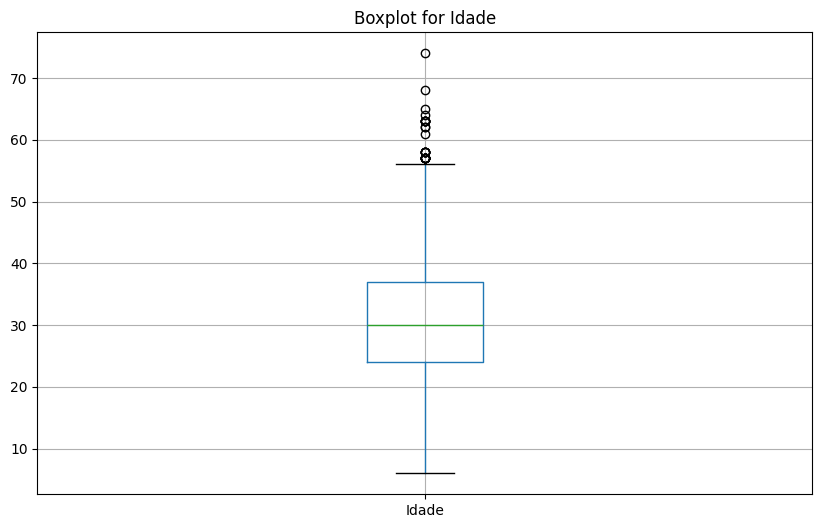

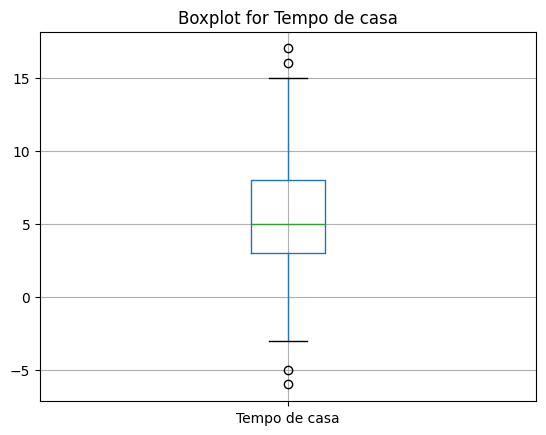

In [26]:
# Análise com gráfico Boxplot

numerical_columns = df.select_dtypes(include='number').columns

plt.figure(figsize=(10, 6))
for column in numerical_columns:
    df.boxplot(column=column)
    plt.title(f'Boxplot for {column}')
    plt.show()

In [27]:
# Removendo Outliers na coluna 'Idade':

Q1_idade = np.percentile(df['Idade'], 25)
Q3_idade = np.percentile(df['Idade'], 75)

IQR_idade = Q3_idade - Q1_idade

idade_minima = Q1_idade - 1.5 * IQR_idade
idade_maxima = Q3_idade + 1.5 * IQR_idade

df = df[(df['Idade'] >= idade_minima) & (df['Idade'] <= idade_maxima)]

In [28]:
# Removendo Outliers na coluna 'Tempo de casa':

Q1_tempo = np.percentile(df['Tempo de casa'], 25)
Q3_tempo = np.percentile(df['Tempo de casa'], 75)

IQR_tempo = Q3_tempo - Q1_tempo

tempo_minima = Q1_tempo - 1.5 * IQR_tempo
tempo_maxima = Q3_tempo + 1.5 * IQR_tempo

df = df[(df['Tempo de casa'] >= tempo_minima) & (df['Tempo de casa'] <= tempo_maxima)]

#### Removendo dados inválidos

##### Tempo de casa negativo

In [29]:
# Encontrando tempos de casa negativos
tempo_casa_negativo = df.loc[df['Tempo de casa'] < 0]
display(tempo_casa_negativo)

,Genero,Idade,Raça,Formação,Estado,Tempo de casa,Departamento,Senioridade
62,Masc,25,pardo,Ensino Superior,Paraná,-2,Desenvolvimento de Produtos,Analista Sênior
105,Masc,39,preto,Ensino Superior,Rio Grande do Sul,-3,Marketing,Analista Pleno
118,Fem,35,pardo,Mestrado,Rio de Janeiro,-2,Vendas,Analista Júnior
428,Masc,28,preto,Mestrado,Paraná,-2,Compras,Analista Sênior
574,Masc,28,branco,Ensino Superior,Rio Grande do Sul,-2,Operações,Analista Júnior
...,...,...,...,...,...,...,...,...
9648,Masc,22,preto,Ensino Superior,Rio Grande do Sul,-1,Administrativo,Gerente
9655,Masc,32,branco,Ensino Superior,São Paulo,-1,Operações,Analista Pleno
9727,Masc,19,branco,Ensino Superior,Rio Grande do Sul,-2,Operações,Analista Sênior
9826,Fem,19,pardo,Ensino Superior,Distrito Federal,-1,Operações,Gerente


_Analisando a coluna 'Tempo de casa' encontramos 96 observações com valor negativo. O que não parece fazer sentido. Como repesentam 96/9701 = 0.01, ou seja, 1% é razoável eliminar essas linhas._

In [30]:
# Removendo pessoas com mais tempo negativos
df.drop(tempo_casa_negativo.index, inplace=True)

##### Tempo de casa zerado

In [31]:
# Encontrando tempos de casa zerados
tempo_casa_zero = df.loc[df['Tempo de casa'] == 0]
display(tempo_casa_zero)

,Genero,Idade,Raça,Formação,Estado,Tempo de casa,Departamento,Senioridade
23,Masc,31,branco,Ensino Médio,Amazonas,0,Operações,Estagiário
29,Fem,29,branco,Ensino Superior,Paraná,0,Administrativo,Gerente
38,Fem,27,preto,Ensino Médio,Mato Grosso,0,Administrativo,Analista Júnior
41,Masc,34,branco,Ensino Superior,Pernambuco,0,TI,Analista Sênior
86,Fem,47,pardo,Ensino Superior,Piauí,0,TI,Analista Sênior
...,...,...,...,...,...,...,...,...
9807,Fem,51,branco,Ensino Superior,Rio de Janeiro,0,Administrativo,Gerente
9871,Masc,30,pardo,Ensino Superior,Acre,0,TI,Analista Pleno
9919,Masc,29,branco,Ensino Superior,Santa Catarina,0,Vendas,Analista Sênior
9946,Fem,41,pardo,Ensino Superior,Amazonas,0,Contabilidade,Analista Júnior


_Os valores zerados para a variável 'Tempo de casa', não serão excluídas, porque entendemos não serem inválidas, apenas que os funcionários não alcançaram 1 (um) ano. Pois assumimos que esse atributo é medido em ano._

##### Menores de idade

In [32]:
# Encontrando Idades inválidas (menores de idade)
menor_idade = df.loc[df['Idade'] < 18]
display(menor_idade)

,Genero,Idade,Raça,Formação,Estado,Tempo de casa,Departamento,Senioridade
2581,Masc,12,preto,Ensino Superior,Ceará,2,Marketing,Analista Pleno
3886,Fem,6,preto,Ensino Superior,Alagoas,9,Recursos Humanos,Analista Júnior
4777,Masc,16,indígena,Pós graduação,Ceará,1,TI,Gerente
4928,Fem,13,preto,Ensino Superior,Amapá,7,Vendas,Analista Pleno
5001,Masc,17,preto,Ensino Superior,Amapá,2,Contabilidade,Analista Júnior
5845,Masc,16,preto,Ensino Superior,Paraná,4,Compras,Analista Pleno
5948,Masc,17,preto,Ensino Superior,Mato Grosso,10,TI,Analista Pleno
6599,Fem,15,indígena,Ensino Superior,Ceará,5,Recursos Humanos,Estagiário
6684,Masc,15,preto,Ensino Superior,Mato Grosso do Sul,9,Recursos Humanos,Analista Júnior
7173,Masc,10,preto,Pós graduação,Rio de Janeiro,5,Desenvolvimento de Produtos,Analista Pleno


In [33]:
# Removendo menores de idade
df = df.drop(df[df['Idade'] < 18].index)

##### Pessoas com mais experiência que idade

In [34]:
# Encontrando Idades maiores que o Tempo de casa
tempo_casa_idade = df[df['Tempo de casa'] > df['Idade']]
display(tempo_casa_idade)

,Genero,Idade,Raça,Formação,Estado,Tempo de casa,Departamento,Senioridade


In [35]:
# Removendo pessoas com mais tempo de casa do que idade
df.drop(tempo_casa_idade.index, inplace=True)

##### Menores de idade na contratação

In [36]:
tempo_casa_menor_idade = df[(df['Idade'] - df['Tempo de casa']) < 18]
display(tempo_casa_menor_idade)

,Genero,Idade,Raça,Formação,Estado,Tempo de casa,Departamento,Senioridade
4,Masc,21,pardo,Ensino Superior,Ceará,5,Recursos Humanos,Analista Júnior
12,Masc,18,preto,Pós graduação,Santa Catarina,8,Administrativo,Analista Júnior
14,Masc,19,branco,Ensino Médio,Amazonas,6,Administrativo,Analista Júnior
18,Masc,18,branco,Ensino Médio,Ceará,5,Contabilidade,Gerente
32,Fem,18,branco,Mestrado,Piauí,5,Marketing,Analista Júnior
...,...,...,...,...,...,...,...,...
9986,Masc,19,preto,Pós graduação,Santa Catarina,3,Recursos Humanos,Analista Sênior
9989,Masc,21,pardo,Pós graduação,Piauí,9,Compras,Analista Júnior
9992,Masc,28,branco,Ensino Superior,Santa Catarina,13,Compras,Diretor
9995,Masc,21,pardo,Ensino Superior,Rondônia,9,Contabilidade,Analista Júnior


_Se subtrairmos o tempo de casa da idade do colaborador, chegaremos a idade na contratação. O que nos retorna 2103 registros com pessoas menores de 18 anos no momento da contratação (excluindo a hipótese de que possam ter sido admitidos Menores Aprendizes, devido sua ausência na coluna Senioridade). Constatamos números absurdos, como contratações aos 5 anos de idade._

In [37]:
# Removendo contratação de menores de idade
df.drop(tempo_casa_menor_idade.index, inplace=True)

#### Corrigindo grafias

In [38]:
df['Senioridade'] = df['Senioridade'].replace('gerente', 'Gerente')

In [39]:
df['Genero'] = df['Genero'].replace({'Fem' : 'Feminino', 'Masc' : 'Masculino'})

In [40]:
df['Raça'] = df['Raça'].replace({'preto' : 'Preto', 'pardo' : 'Pardo', 'branco' : 'Branco', 'indígena' : 'Indígena', 'amarelo' : 'Amarelo'})

In [41]:
df = df.rename(columns={'Genero': 'Gênero', 'Tempo de casa' : 'Tempo de Empresa'})

#### Coluna diversidade

In [42]:
# Criando coluna Diversidade para facilitar a visualização das diversidades presentes
df['Diversidade'] = df ['Raça'] != 'branco'

#### Organização

In [43]:
# Alterando a ordem das colunas para uma melhor visualização
nova_ordem_colunas = ['Gênero', 'Idade', 'Raça', 'Diversidade', 'Formação', 'Estado', 'Tempo de Empresa', 'Departamento', 'Senioridade']
df = df.reindex(columns=nova_ordem_colunas)

In [44]:
#Conferindo resultados das transformações
df.head(10)

,Gênero,Idade,Raça,Diversidade,Formação,Estado,Tempo de Empresa,Departamento,Senioridade
0,Feminino,34,Pardo,True,Ensino Médio,Santa Catarina,12,Compras,Analista Pleno
1,Feminino,26,Pardo,True,Ensino Médio,Pará,6,Contabilidade,Analista Júnior
2,Masculino,35,Pardo,True,Ensino Médio,Santa Catarina,5,Vendas,Analista Pleno
3,Masculino,24,Pardo,True,Ensino Superior,Tocantins,4,Administrativo,Gerente
5,Feminino,49,Pardo,True,Ensino Superior,São Paulo,3,Contabilidade,Analista Pleno
6,Masculino,29,Pardo,True,Pós graduação,Ceará,9,Compras,Analista Sênior
7,Masculino,35,Pardo,True,Ensino Superior,Rondônia,8,Operações,Analista Júnior
8,Masculino,40,Pardo,True,Mestrado,Amapá,1,Administrativo,Analista Pleno
9,Masculino,33,Pardo,True,Ensino Superior,Minas Gerais,3,Desenvolvimento de Produtos,Analista Pleno
10,Feminino,54,Pardo,True,Pós graduação,São Paulo,5,Recursos Humanos,Analista Sênior


#### Exportação

In [45]:
# Exportação dos dados limpos e organizados para importação no Power BI
df.to_csv('base_de_dados_tratada.csv')

## Análise estatística

#### Descrição dos dados

In [46]:
df[['Idade', 'Tempo de Empresa']].describe()

,Idade,Tempo de Empresa
count,7458.000000,7458.000000
mean,33.598284,5.158488
std,7.505578,2.843669
min,18.000000,0.000000
25%,28.000000,3.000000
50%,33.000000,5.000000
75%,38.000000,7.000000
max,56.000000,15.000000


_A idade média é de aproximadamento 30,92 anos. O desvio padrão que mede a dispersão dos dados em relação a média de 8,66 anos.
Os quartis que representam a distribuição indicam que 25% dos funcionários têm 24 anos ou menos, 50% dos funcionários têm 30 anos ou menos, e 75% dos funcionários têm 37 anos ou menos._

_O tempo de empresa média é de aproximadamento 5,56 anos. O desvio padrão que mede a dispersão dos dados em relação a média de 2,89 anos.
Os quartis que representam a distribuição indicam que 25% dos funcionários têm 4 anos de casa ou menos, 50% dos funcionários têm 6 anos de casa ou menos, e 75% dos funcionários têm 8 anos de casa ou menos._

#### Correlação dos dados

In [47]:
correlacao = df[['Idade', 'Tempo de Empresa']].corr()
print(correlacao)


                     Idade  Tempo de Empresa
Idade             1.000000          0.225122
Tempo de Empresa  0.225122          1.000000


_A matriz de correlação indica que as Colunas Idade e Tempo de casa pouco influenciam uma com a outra._

#### P-valor

In [48]:
departamentos = [df[df['Departamento'] == departamento]['Idade'] for departamento in df['Departamento'].unique()]
resultado = f_oneway(*departamentos)

print(f"F: {resultado.statistic:.2f}")
print(f"P-value: {resultado.pvalue:.2f}")


F: 0.36
P-value: 0.94


_Não podemos concluir que há diferenças significativas nas idades dos funcionários entre os diferentes departamentos._

## Análise e exploração dos dados

### Como os colaboradores estão distribuídos

#### Por Gênero

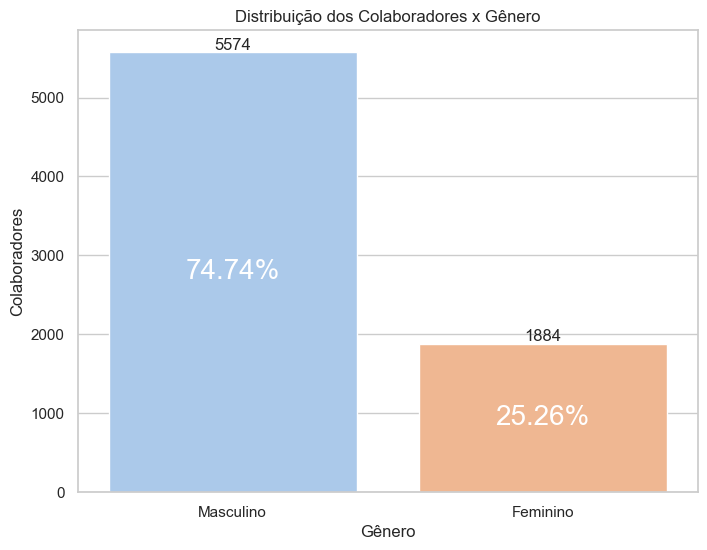

In [49]:
contagem_genero = df['Gênero'].value_counts()
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
barras = sns.barplot(x=contagem_genero.index, y=contagem_genero.values, palette="pastel", hue=contagem_genero.index, dodge=False, legend=False)

plt.title('Distribuição dos Colaboradores x Gênero')
plt.xlabel('Gênero')
plt.ylabel('Colaboradores')

for barra in barras.patches:
    barras.annotate(format(barra.get_height(), '.0f'), 
                   (barra.get_x() + barra.get_width() / 2, 
                    barra.get_height()), 
                   ha='center', va='center',
                   size=12, xytext=(0, 5),
                   textcoords='offset points')

total = df.shape[0]
for barra in barras.patches:
    barras.annotate(f'{barra.get_height() / total:.2%}', 
                   (barra.get_x() + barra.get_width() / 2, 
                    barra.get_height() / 2), 
                   ha='center', va='center',
                   size=20, xytext=(0, 0),
                   textcoords='offset points', color='white')
plt.show()

_Os dados apontam um desequilíbrio de gênero, buscando na referência uma meta. Assim, uma primeira análise se faz necessária por gênero.



*Com base na visualização da distribuição por gênero, observamos que a maioria dos registros está associada ao gênero masculino (7194 registros), representando aproximadamente 74,9% do total, enquanto o gênero feminino corresponde a cerca de 25,1% (2411 registros). Essa disparidade sugere uma possível desproporção na representação de gênero nos dados analisados. Tal análise inicial pode fornecer insights valiosos para compreender melhor a dinâmica dos dados e pode ser o ponto de partida para investigações mais aprofundadas sobre questões de equidade de gênero ou viés nos conjuntos de dados analisados.*
_

#### Por Idade

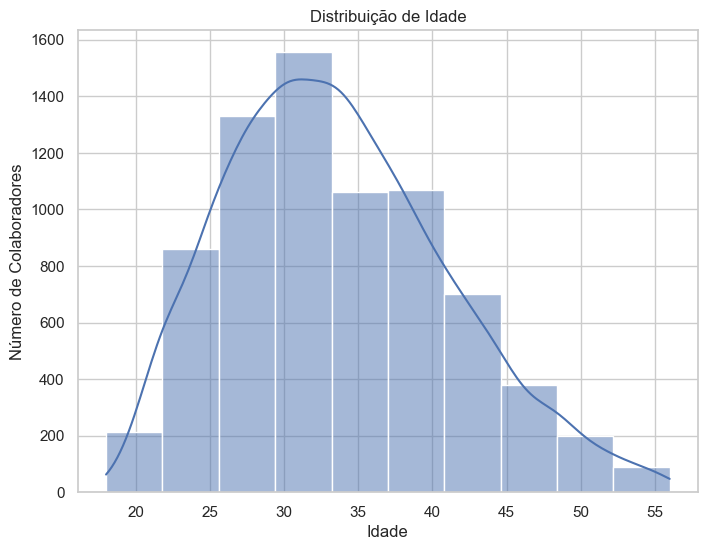

In [50]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
histograma = sns.histplot(data=df, x='Idade', bins=10, kde=True)

plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Número de Colaboradores')

plt.show()

_Apesar de bem distribuída, a Corp solutios apresenta em sua maioria colaboradores na faixa de 30-40 anos._

#### Por Raça

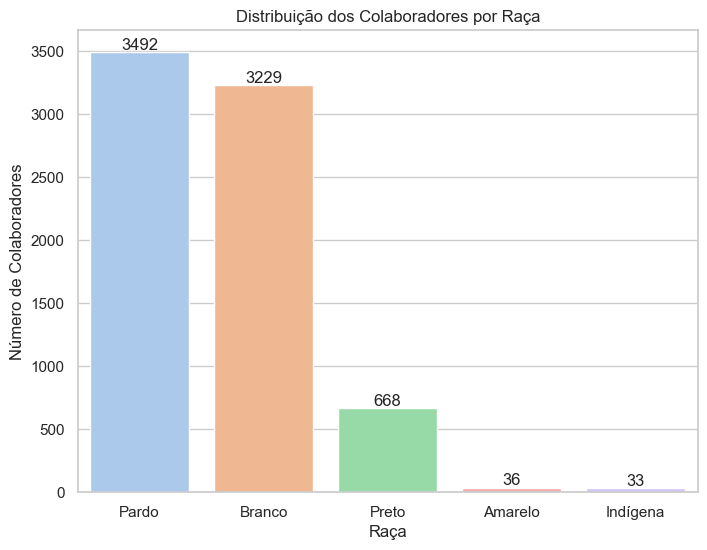

In [51]:
contagem_raca = df['Raça'].value_counts()
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
barras = sns.barplot(x=contagem_raca.index, y=contagem_raca.values, hue=contagem_raca.index, palette="pastel")

plt.title('Distribuição dos Colaboradores por Raça')
plt.xlabel('Raça')
plt.ylabel('Número de Colaboradores')

for barra in barras.patches:
    barras.annotate(format(barra.get_height(), '.0f'), 
                   (barra.get_x() + barra.get_width() / 2, 
                    barra.get_height()), 
                   ha='center', va='center',
                   size=12, xytext=(0, 5),
                   textcoords='offset points')

plt.show()

_Consultar referência para entender se faz sentido essa distribuição de raça. Contudo, chama atenção a frequência de pardos, nitidamente maior que pretos._

#### Por Escolaridade

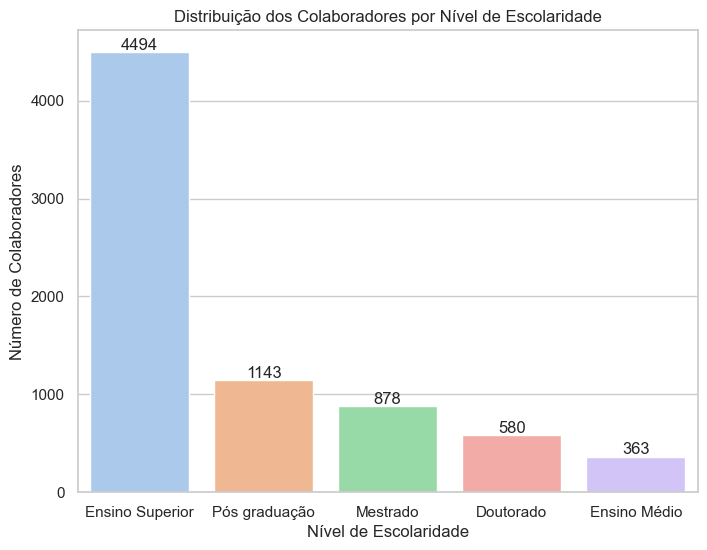

In [52]:
contagem_escolaridade = df['Formação'].value_counts()
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
barras = sns.barplot(x=contagem_escolaridade.index, y=contagem_escolaridade.values, hue=contagem_escolaridade.index, palette="pastel")

plt.title('Distribuição dos Colaboradores por Nível de Escolaridade')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Número de Colaboradores')

for barra in barras.patches:
    barras.annotate(format(barra.get_height(), '.0f'), 
                   (barra.get_x() + barra.get_width() / 2, 
                    barra.get_height()), 
                   ha='center', va='center',
                   size=12, xytext=(0, 5),
                   textcoords='offset points')

plt.show()

_Chama atenção a frequência de ensino superior, consideravelmente maior que os outros casos. Existe uma tendência da empresa em contratar pessoas com formação de ensino superior. Indica uma possibilidade de subemprego, está de acordo com as referências do estudo._

#### Por Região (Nordeste, Sul, etc.)

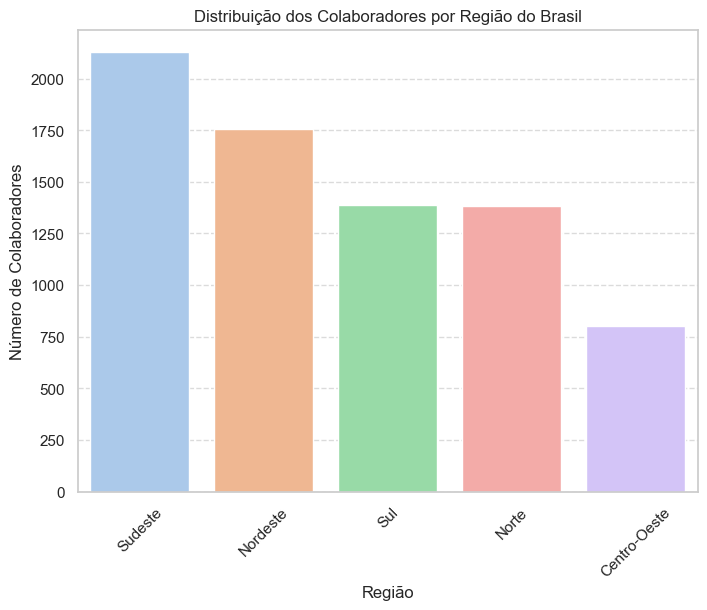

In [53]:
regioes = {
    'Acre': 'Norte', 'Alagoas': 'Nordeste', 'Amapá': 'Norte', 'Amazonas': 'Norte', 'Bahia': 'Nordeste', 'Ceará': 'Nordeste',
    'Distrito Federal': 'Centro-Oeste', 'Espírito Santo': 'Sudeste', 'Goiás': 'Centro-Oeste', 'Maranhão': 'Nordeste', 'Mato Grosso': 'Centro-Oeste',
    'Mato Grosso do Sul': 'Centro-Oeste', 'Minas Gerais': 'Sudeste', 'Pará': 'Norte', 'Paraíba': 'Nordeste', 'Paraná': 'Sul', 'Pernambuco': 'Nordeste',
    'Piauí': 'Nordeste', 'Rio de Janeiro': 'Sudeste', 'Rio Grande do Norte': 'Nordeste', 'Rio Grande do Sul': 'Sul', 'Rondônia': 'Norte', 'Roraima': 'Norte', 
    'Santa Catarina': 'Sul', 'São Paulo': 'Sudeste', 'Sergipe': 'Nordeste', 'Tocantins': 'Norte'
}

df['Região'] = df['Estado'].map(regioes)

contagem_regiao = df['Região'].value_counts()


sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=contagem_regiao.index, y=contagem_regiao.values, hue=contagem_regiao.index, palette="pastel")
plt.title('Distribuição dos Colaboradores por Região do Brasil')
plt.xlabel('Região')
plt.ylabel('Número de Colaboradores')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

_A distribuição regional indica que realmente a Corp Solutions é uma empresa oferece jornada flexíveis e modelos de trabalho remotos, com a distribuição pulverizada pelas regiões do Brasil.
Observamos uma discreta vantagem no Sudeste, porém justificável como sendo o centro comercial do país._

#### Por Estado (UF)

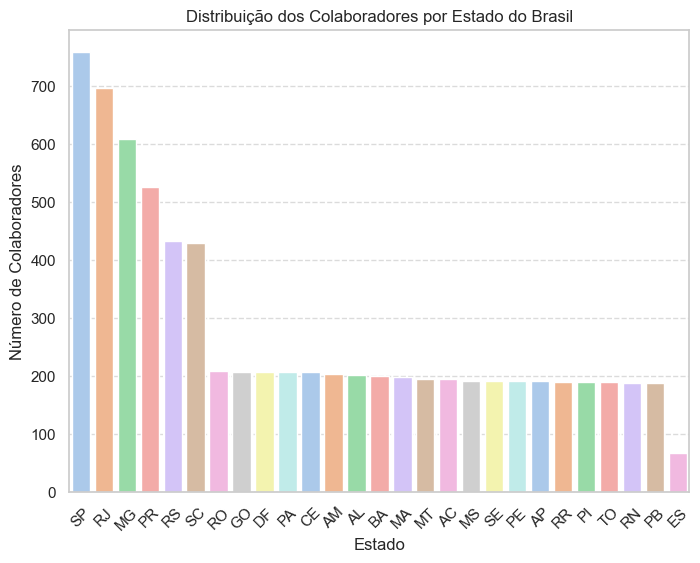

In [54]:
uf = {
        'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM', 'Bahia': 'BA',
        'Ceará': 'CE', 'Distrito Federal': 'DF', 'Espírito Santo': 'ES', 'Goiás': 'GO',
        'Maranhão': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG',
        'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR', 'Pernambuco': 'PE', 'Piauí': 'PI',
        'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS',
        'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC', 'São Paulo': 'SP',
        'Sergipe': 'SE', 'Tocantins': 'TO'
}
    
df['UF'] = df['Estado'].map(uf)
contagem_estado = df['UF'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=contagem_estado.index, y=contagem_estado.values, hue=contagem_estado.index, palette="pastel")
plt.title('Distribuição dos Colaboradores por Estado do Brasil')
plt.xlabel('Estado')
plt.ylabel('Número de Colaboradores')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

_Os gráficos mostram uma tendência em colaboradores da região sudeste e do estado de SP, RJ, MG, PR, SC e RS. A estratégia de equilibrar por região pode ser difícil dependendo da sua localização.
Lembrando que esquilibrar por região é algo relavante, pois uma mistura de diferentes regiões traz uma riqueza cultural ao dia a dia de trabalho._

#### Por Tempo de empresa

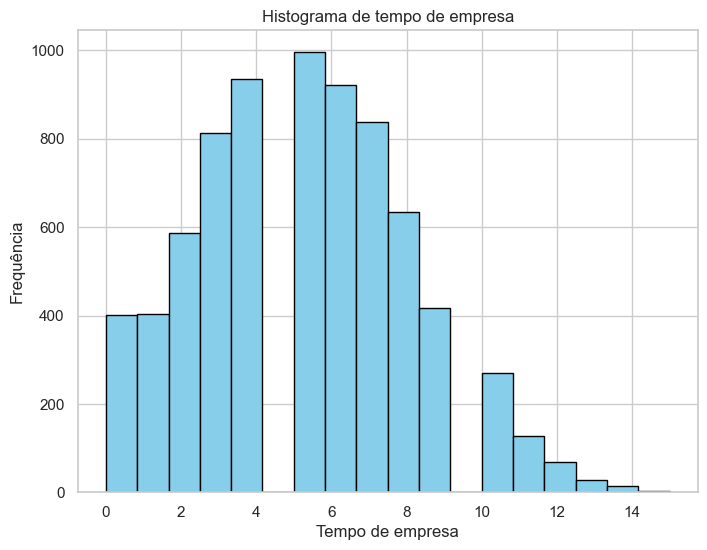

In [55]:
plt.figure(figsize=(8, 6))
plt.hist(df['Tempo de Empresa'], bins=18, color='skyblue', edgecolor='black')
plt.title('Histograma de tempo de empresa')
plt.xlabel('Tempo de empresa')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

_Os dados mostram frequência muito elevada de pessoas com 4 a 7,5 anos de trabalho e uma moderada frequência de novos colaboradores, assim indica que a estratégia interessante é trabalhar a diversidade com a projeção de contratação de novos colaboradores._

#### Por Departamento

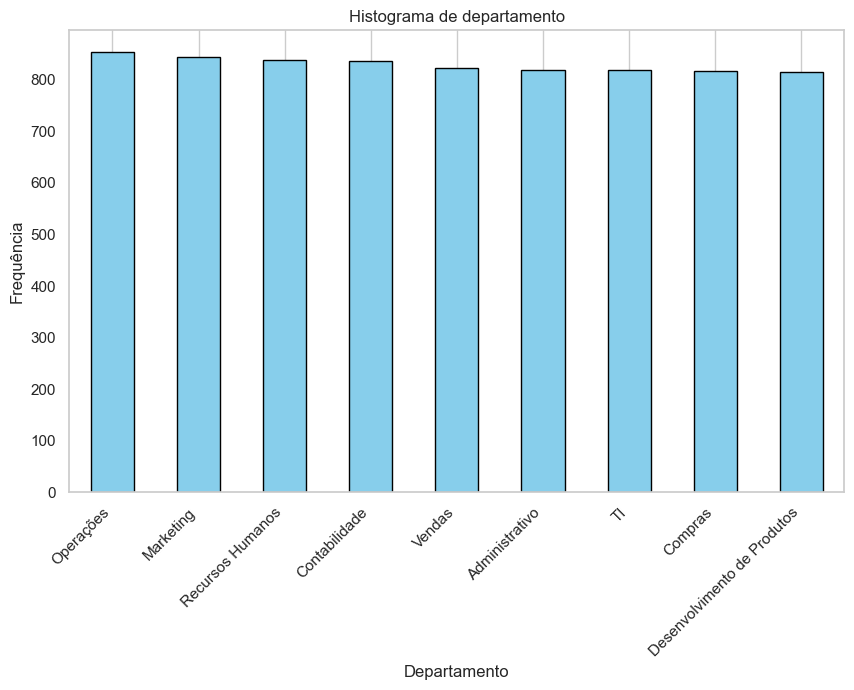

In [56]:
department_counts = df['Departamento'].value_counts()

plt.figure(figsize=(10, 6))
department_counts.plot(kind='bar', color='skyblue', edgecolor='black')  
plt.title('Histograma de departamento')
plt.xlabel('Departamento')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

_A distribuição da equipe se apresenta como nivelada entre os departamentos._

#### Por Senioridade

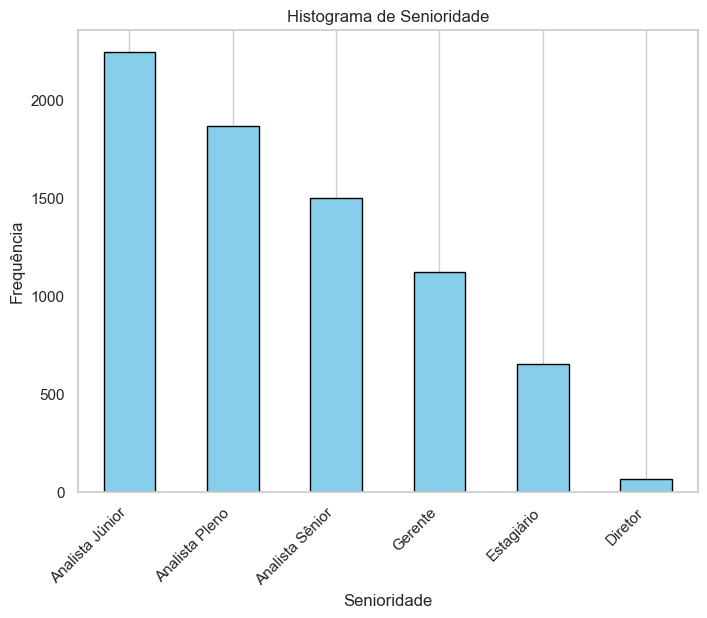

In [57]:
senioridade_counts = df['Senioridade'].value_counts()

plt.figure(figsize=(8, 6))
senioridade_counts.plot(kind='bar', color='skyblue', edgecolor='black')  
plt.title('Histograma de Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

_A senioridade apresenta dados naturais ao desenvolvimento de pessoas, visto que pessoas com menor senioridade apresentam um gasto menor para a empresa. Assim, é natural ter um número menor de pessoas com alto nível de senioridade._

### Como as variáveis se relacionam?

#### Gênero e Raça

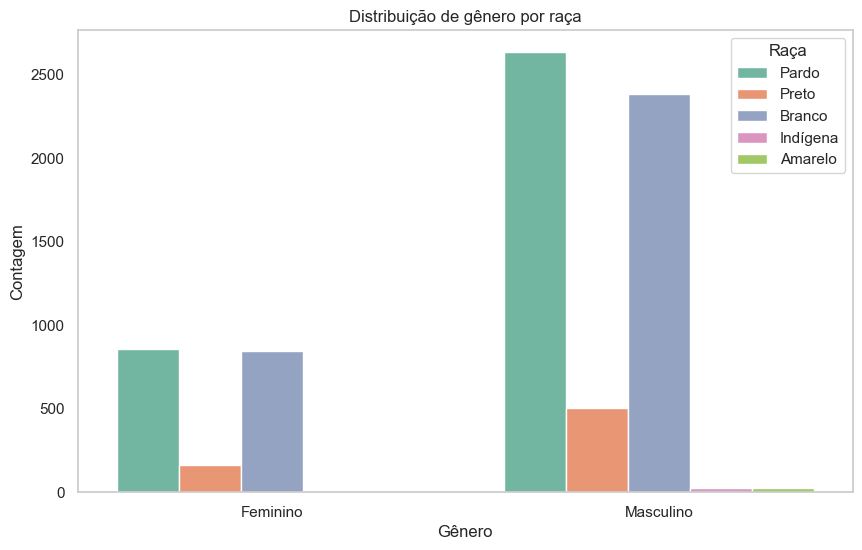

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gênero', hue='Raça', data=df, palette='Set2')
plt.title('Distribuição de gênero por raça')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Raça')
plt.grid(axis='y')
plt.show()

_Os gráficos apresentam relações semelhantes, contudo é possível notar uma maior quantidade de homens pardos em relação às mulheres pardas, o que pode sugerir a necessidade de contração de mais mulheres pardas. Contudo, devido à apresetarem resultados semelhantes, não é possível estabelecer um viés de contratação._

#### Gênero e Formação

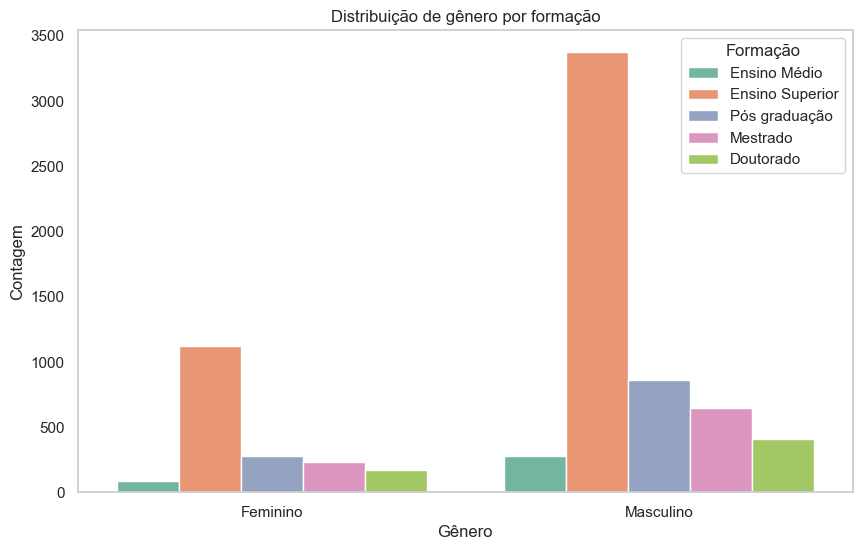

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gênero', hue='Formação', data=df, palette='Set2')
plt.title('Distribuição de gênero por formação')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Formação')
plt.grid(axis='y')

plt.show()

*A análise da distribuição por formação, diferenciando por gênero, revela insights interessantes sobre a educação dos indivíduos no conjunto de dados. Ao considerar os diferentes níveis de formação, observamos que, em todos os níveis, há uma predominância de homens em relação às mulheres. Por exemplo, no nível de ensino superior, os homens superam as mulheres com uma diferença de aproximadamente 3 para 1. Essa disparidade se mantém em outros níveis de formação, como pós-graduação, mestrado, doutorado e ensino médio. Essa análise sugere disparidades de gênero na educação, destacando a importância de políticas e iniciativas para promover a igualdade de oportunidades educacionais para todos os gêneros.*

#### Gênero e Idade

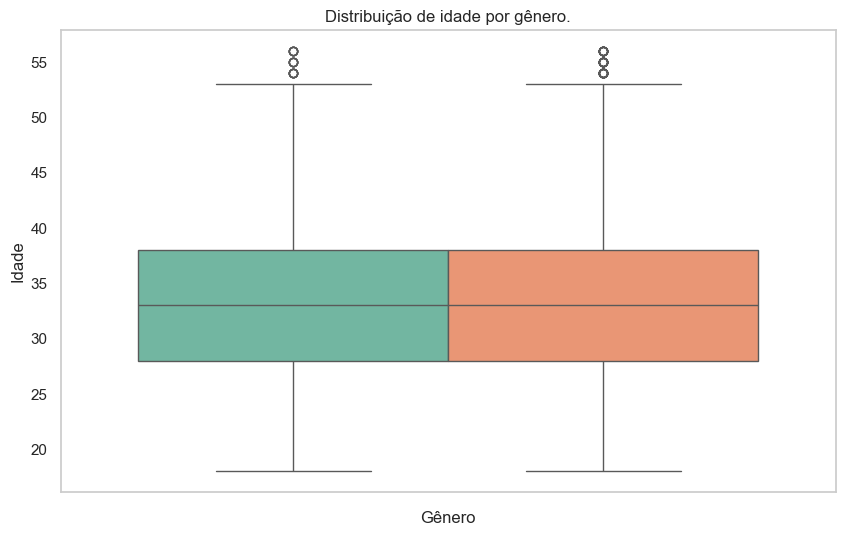

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(hue='Gênero', y='Idade', data=df, palette='Set2', legend=False)
plt.title('Distribuição de idade por gênero.')
plt.xlabel('Gênero')
plt.ylabel('Idade')
plt.grid(axis='y')
plt.show()

_A distribuição entre idades não parece ser diferenciada conforme o gênero._

#### Gênero e Região

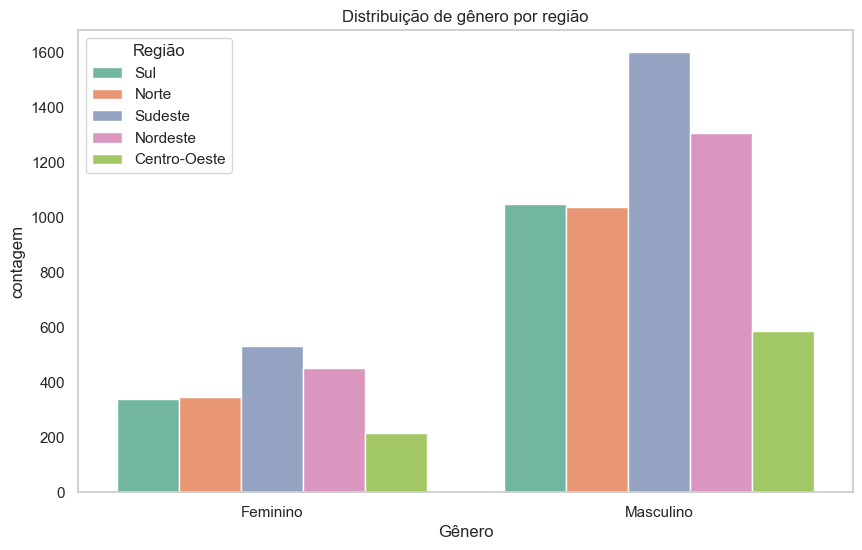

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gênero', hue='Região', data=df, palette='Set2')
plt.title('Distribuição de gênero por região')
plt.xlabel('Gênero')
plt.ylabel('contagem')
plt.legend(title='Região')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

_Não foram observadas conclusões ou uma evidente correlação entre o Gênero e Região._

#### Gênero e Tempo de empresa

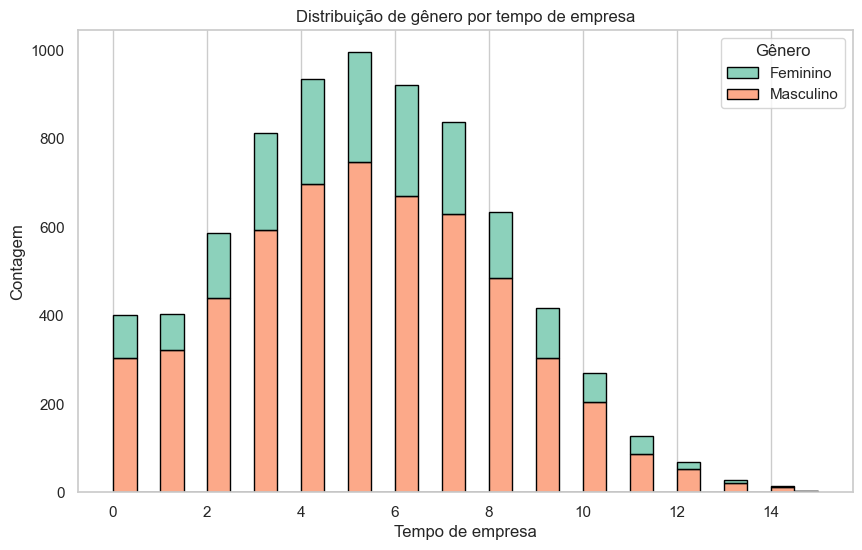

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Tempo de Empresa', hue='Gênero', palette='Set2', multiple='stack', edgecolor='black', bins=30)
plt.title('Distribuição de gênero por tempo de empresa')
plt.xlabel('Tempo de empresa')
plt.ylabel('Contagem')
plt.grid(axis='y')
plt.show()

_A análise do gráfico não apresenta alguma influência do gênero em relação ao tempo de empresa, sugerindo que ainda podem não ter sido implantadas políticas de diversidade. Ressalta-se que, para os colaboradores com maior tempo de empresa, diminui a quantidade de mulheres._

#### Gênero e Departamento

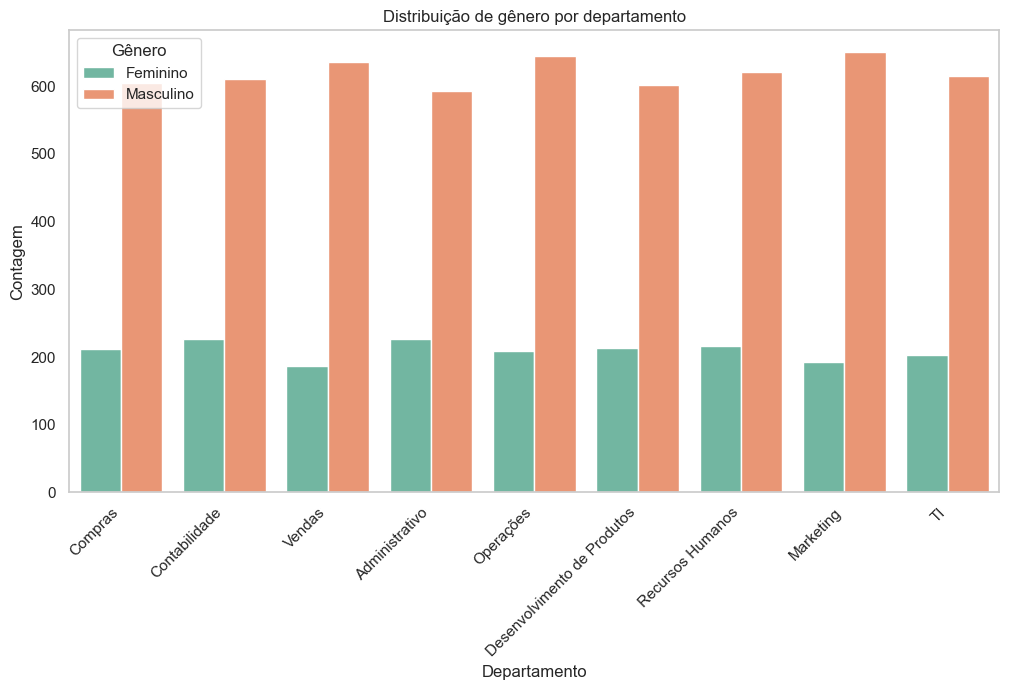

In [63]:
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.countplot(x='Departamento', hue='Gênero', data=df, palette='Set2')
plt.title('Distribuição de gênero por departamento')
plt.xlabel('Departamento')
plt.ylabel('Contagem')
plt.legend(title='Gênero')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

_A distribuição de vagas no departamento mantém o nivelamento, reforçando a necessidade de contratação de mais mulheres._

#### Gênero e Senioridade?

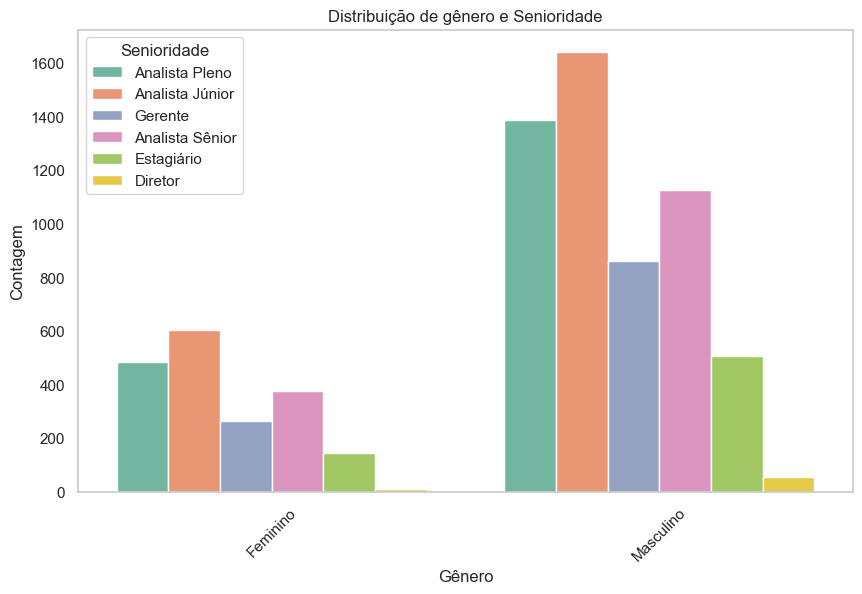

In [64]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(x='Gênero', hue='Senioridade', data=df, palette='Set2')
plt.title('Distribuição de gênero e Senioridade')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Senioridade')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')
plt.show()

_Analisando esse gráfico, é possível notar que o gênero não influencia na hierarquia, destaque para o cargo de diretoria que não aparece nos gráficos do gênero feminino. O que sugere que é necessária uma política de aumentar a contratação de mulheres e que futuramente pode equilibrar esses cargos._

# Comunicação dos resultados

## Situação atual Corp Solutions

## Diversidade

(GPTW)
Os negros são 56% da população brasileira e movimentam R$ 1,7 tri por ano,
apesar de terem uma renda média R$ 1.200 menor que dos brancos.

3 de agosto: se todos recebessem um salário diário igual em um ano, a mulher
negra começaria a ser remunerada apenas nessa data.

Empresas mais diversas e melhores: as empresas premiadas do GPTW étnico-racial
também são mais diversas em relação a gênero, e apresentam rotatividade
voluntária 88% menor que a média no Brasil.

(MCKINSEY)

A diversidade de gênero está correlacionada tanto com a lucratividade como com a criação de valor. No conjunto de dados de 2017, encontramos uma correlação positiva entre diversidade de gênero nas equipes executivas e as duas medidas de performance financeira que adotamos: em todo o mundo, empresas do quartil superior em diversidade de gênero nas equipes executivas tinham uma probabilidade 21% maior de ter margem EBIT superior à de seus pares do quartil inferior; além disso, tinham uma probabilidade 27% maior de criar valor no longo prazo do que seus pares do quartil inferior, medido pela margem de lucro econômico (Quadro 2).




## Treinamento e Conscientização

## Novas contratações

Embora a empresa possa ter interesse em aumentar a representatividade, ela vai encontrar os profissionais com determinada características?
Implementar programas de recrutamento ativo direcionados a grupos minoritários sub-representados.
Estabelecer parcerias com organizações que apoiam candidatos de grupos minoritários para aumentar o alcance do recrutamento.
Soluções para formar profissionalizais na área (Potencia Tech é uma inspiração)
Garantir que os processos de seleção sejam imparciais e livres de preconceitos, utilizando técnicas de recrutamento cego quando apropriado.

## Inclusão: PCD

(GPTW)
Investir em pessoas com deficiência vale a pena
Monday, March 20, 2023 ©Great Place To Work® Institute, Inc. All Rights Reserved. 18
A lei de cotas existe desde 1991 no Brasil, mas cumpre-se apenas metade dela,
atualmente. 1
Multas: podem ser de até R$ 250 mil por pessoa com deficiência não contrataa.
2
Apenas 1% dos trabalhadores é uma pessoa com deficiência, mas 8,4% da
população brasileira acima de dois anos possui alguma deficncia.
3

## LGBTQIA+

(GPTW)

Retorno do índice LGBTQ100 (NYSE) = crescimento de 12,0%.
Retorno do índice S&P500 = crescimento de 7,8%.

O público LGBTQIA+ consome +25% que os heterossexuais;
64% das pessoas LGBTQIA+ ainda não se assumiram no trabalho.

Há o dobro de pessoas LGBTQIA+ nas empresas premiadas do que
nas não-premiadas, em todos os níveis.


## Plano de Ação

# Referências

Durante o desenvolvimento dessa análise buscamos embasar nossas conclusões em fontes externas:

[Indicadores para Diversidade e Inclusão: por que mensurar e quais métricas utilizar](https://treediversidade.com.br/indicadores-para-diversidade-e-inclusao/) (Tree, 2022)

[A diversidade como alavanca de performance](https://www.mckinsey.com/capabilities/people-and-organizational-performance/our-insights/delivering-through-diversity/pt-BR) (Mckinsey, 2017)

[Diversity, Equity & Inclusion - Benchmarking Survey](https://www.pwc.com.br/pt/estudos/servicos/consultoria-negocios/2023/pesquisa-global-de-diversidade-equidade-e-inclusao.html) (PwC, 2022)


[Ranking Diversidade](https://gptw.com.br/wp-content/uploads/2023/03/Rankings-Diversidade-2023-v.2.pdf)(GPTW, 2023